Step 1: Install Required Libraries

In [1]:
!pip install joblib scikit-learn pandas numpy

Step 2: Import Necessary Libraries

In [2]:
# Data handling and numerical operations
import pandas as pd
import numpy as np

# Model saving/loading
import joblib

# Visualization
import matplotlib.pyplot as plt

# Machine Learning model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Step 3: Load the Dataset

In [3]:
# Define the file path where the dataset is stored
file_path = "/content/desharnais.csv"  # Modify this if needed

# Load dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to understand the data structure
df.head()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1


Step 4: Check for Missing Values

In [4]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display columns with missing values (if any)
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

Missing Values in Each Column:
Series([], dtype: int64)


Step 5: Rename Columns for Consistency

Ensuring column names are consistent and readable improves maintainability.

In [5]:
# Rename column to ensure consistent naming conventions
df.rename(columns={'PointsAjust': 'PointsAdjust'}, inplace=True)

# Verify that the column name has been updated
df.columns

Index(['id', 'Project', 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Effort',
       'Transactions', 'Entities', 'PointsNonAdjust', 'Adjustment',
       'PointsAdjust', 'Language'],
      dtype='object')

Step 6: Drop Unnecessary Columns

Some columns may not be useful for training. We drop id and Project as they do not contribute to effort prediction.

In [6]:
# Remove non-relevant columns that do not impact the model
df.drop(['id', 'Project'], axis=1, inplace=True)

# Display the remaining columns to verify
df.head()

,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAdjust,Language
0,1,4,85,12,5152,253,52,305,34,302,1
1,0,0,86,4,5635,197,124,321,33,315,1
2,4,4,85,1,805,40,60,100,18,83,1
3,0,0,86,5,3829,200,119,319,30,303,1
4,0,0,86,4,2149,140,94,234,24,208,1


Step 7: Define Features and Target Variable

The model learns from input features to predict the target variable (Effort).

In [7]:
# Define the feature columns (independent variables)
features = ['TeamExp', 'ManagerExp', 'YearEnd', 'Length']

# Define the target variable (dependent variable)
target = 'Effort'

# Create feature matrix (X) and target vector (y)
X = df[features]
y = df[target]

# Display feature and target summary
print("Selected Features:", features)
print("Target Variable:", target)

Selected Features: ['TeamExp', 'ManagerExp', 'YearEnd', 'Length']
Target Variable: Effort


Step 8: Split Data into Training and Testing Sets

We divide the data into 80% training and 20% testing to evaluate the model properly.

In [8]:
# Perform an 80-20 train-test split to train and validate the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the split data
print(f"Training Data Shape: {X_train.shape}, Testing Data Shape: {X_test.shape}")

Training Data Shape: (64, 4), Testing Data Shape: (17, 4)


Step 9: Train the Linear Regression Model

We initialize and train a Linear Regression model, which finds the best-fit line for predicting Effort.

In [9]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training dataset
model.fit(X_train, y_train)

# Display a message confirming the model has been trained
print("Linear Regression model training complete.")

Linear Regression model training complete.


Step 10: Save the Trained Model

Once trained, we save the model so it can be used later without retraining.

In [10]:
# Define the filename for the saved model
model_filename = "effort_prediction_model.pkl"

# Save the trained model to a .pkl file using joblib
joblib.dump(model, model_filename)

# Confirm the model has been saved
print(f"Model saved as {model_filename}")

Model saved as effort_prediction_model.pkl


Step 11: Make Predictions on the Test Data

The model is now used to predict Effort using the test data.

In [11]:
# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

# Display a few predictions alongside actual values
comparison_df = pd.DataFrame({'Actual Effort': y_test.values, 'Predicted Effort': y_pred})
print(comparison_df.head())

   Actual Effort  Predicted Effort
0           3927       2822.826955
1           5152       4859.282593
2           5775       2080.892668
3            710       3817.914199
4           4494       6007.821182


Step 12: Evaluate Model Performance

Measure the model’s accuracy using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R² Score.

In [12]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred)

# Display the evaluation results
print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 5952319.3171
Root Mean Squared Error (RMSE): 2439.7376
Mean Absolute Error (MAE): 1975.1344
R-squared (R²): 0.5335


Step 13: Verify Model Predictions on Sample Input

We test the trained model with a new input to see how it predicts effort.

In [13]:
# Define a sample input to test the model
sample_input = np.array([[3, 4, 85, 8]])  # Example feature values

# Predict effort using the trained model
predicted_effort = model.predict(sample_input)

# Display the predicted value
print(f"\nPredicted Effort for sample input: {predicted_effort[0]:.4f}")


Predicted Effort for sample input: 3442.3426


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Step 14: Visualize Model Performance

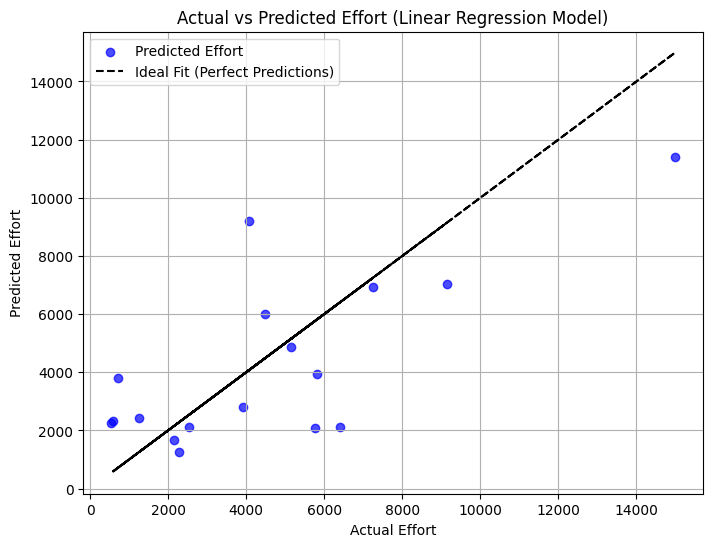

In [14]:
# Create a scatter plot to compare actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label="Predicted Effort")
plt.plot(y_test, y_test, 'k--', label="Ideal Fit (Perfect Predictions)")  # Ideal case (y = x)
plt.xlabel("Actual Effort")
plt.ylabel("Predicted Effort")
plt.title("Actual vs Predicted Effort (Linear Regression Model)")
plt.legend()
plt.grid(True)
plt.show()

Step 16: Save Model Performance Metrics

In [15]:
# Create a dictionary to store evaluation metrics
evaluation_metrics = {
    "Mean Squared Error (MSE)": mse,
    "Root Mean Squared Error (RMSE)": rmse,
    "Mean Absolute Error (MAE)": mae,
    "R-squared (R²)": r2
}

# Save the metrics dictionary as a .pkl file
metrics_filename = "model_evaluation_metrics.pkl"
joblib.dump(evaluation_metrics, metrics_filename)

# Confirm that the metrics file has been saved
print(f"Model evaluation metrics saved as {metrics_filename}")

Model evaluation metrics saved as model_evaluation_metrics.pkl
